In [ ]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=50,centers=2,cluster_std=0.6,random_state=0)

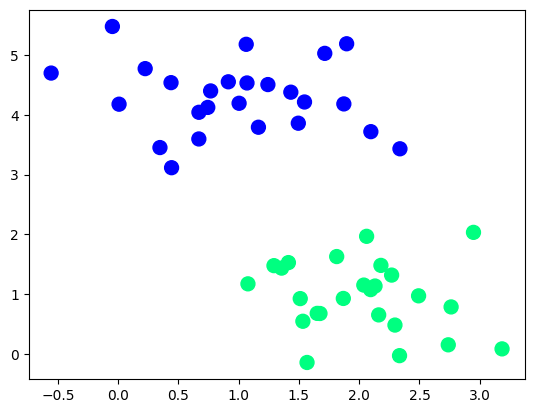

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap='winter')
plt.show()

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1)
model.fit(X,y)

SVC(C=1, kernel='linear')

In [ ]:
import numpy as np
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

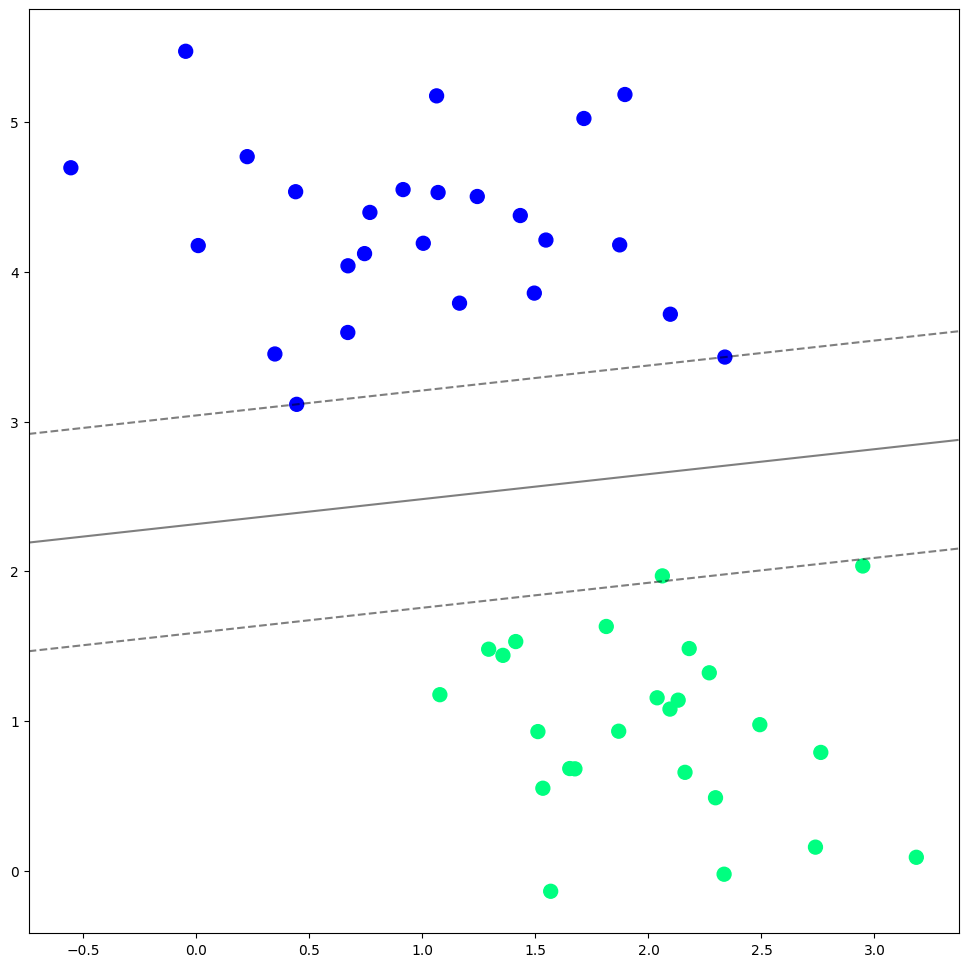

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap='winter')
plot_svc_decision_function(model)

In [ ]:
X,y=make_blobs(n_samples=60,centers=2,cluster_std=0.6,random_state=0)

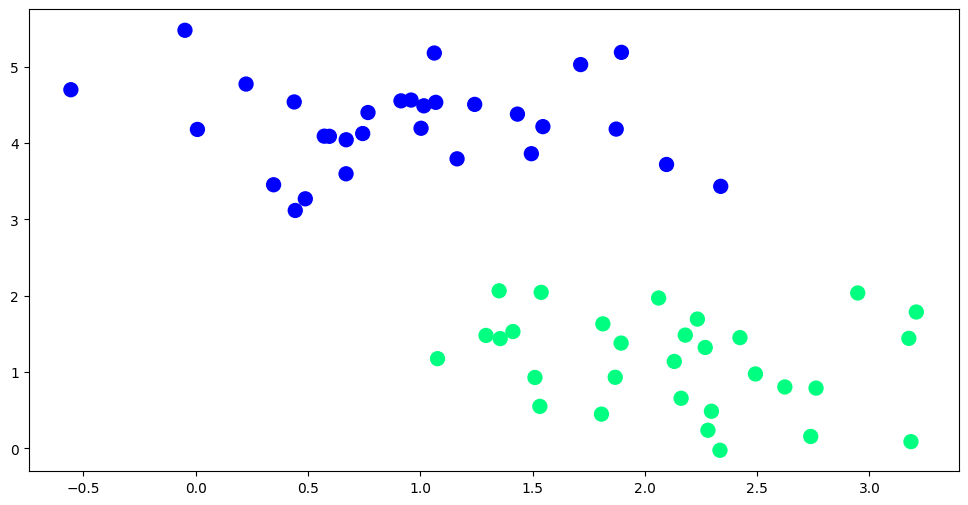

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap='winter')
plt.show()

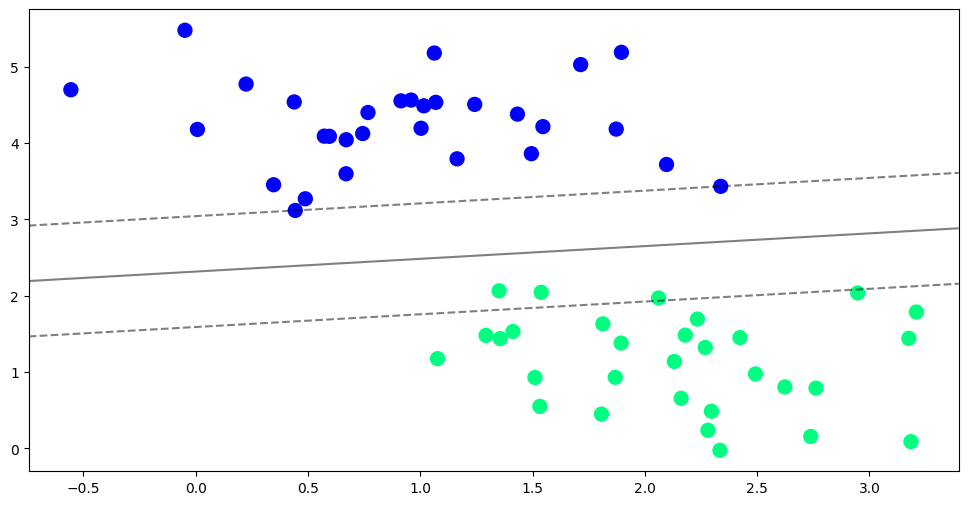

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap='winter')
plot_svc_decision_function(model)

#`Importance of C parameter`

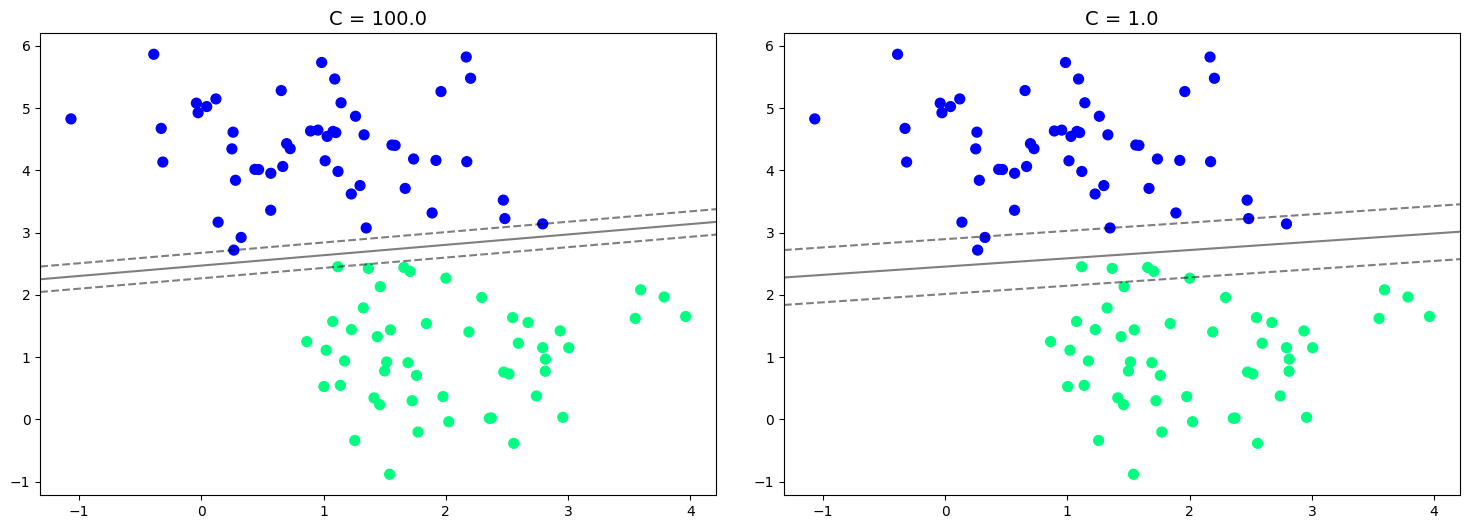

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [ ]:
from sklearn.datasets import make_circles
X,y=make_circles(100,factor=0.1,noise=0.1)

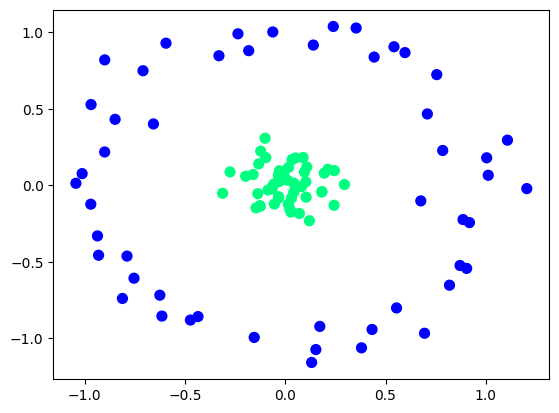

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
classifier=SVC(kernel='linear')
classifier.fit(X_train,y_train.ravel())

SVC(kernel='linear')

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.65


In [ ]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=5,shuffle=True)
cv_scores_train = cross_val_score(classifier, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(classifier, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.525
0.3


<Axes: >

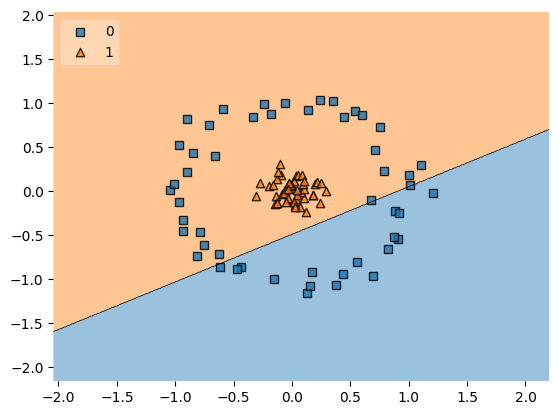

In [ ]:
from mlxtend.plotting import plot_decision_regions
# Plot the decision regions with customizations
plot_decision_regions(X=X, y=y, clf=classifier, legend=2)
fig, ax = plt.subplots(figsize=(8, 6))  # Custom figure size
# Customize labels, title, etc.
ax.set_xlabel('Feature 1')  # Custom X-axis label
ax.set_ylabel('Feature 2')  # Custom Y-axis label
ax.set_title('Customized Decision Boundary Plot')  # Custom title
# Display the plot
plt.show()

In [ ]:
np.exp(-(X**2).sum(1))

array([0.99434926, 0.354624  , 0.26868892, 0.25634197, 0.97117297,
       0.96166948, 0.98634746, 0.97845716, 0.98333621, 0.91647446,
       0.91994838, 0.95891739, 0.32932231, 0.99332359, 0.96685166,
       0.42300404, 0.32116006, 0.39547718, 0.23435942, 0.95773208,
       0.44568072, 0.30643671, 0.40687844, 0.62669307, 0.96623632,
       0.96548744, 0.33617742, 0.92645609, 0.3281014 , 0.95848371,
       0.35756024, 0.34054572, 0.99621436, 0.24184292, 0.93396891,
       0.41377873, 0.32827235, 0.35636421, 0.29602251, 0.35318201,
       0.33349715, 0.40422965, 0.29892377, 0.99216135, 0.99199272,
       0.99201633, 0.39115596, 0.96616892, 0.9601116 , 0.95694084,
       0.42397721, 0.36253319, 0.98900286, 0.90064096, 0.48706885,
       0.94549034, 0.35523999, 0.34082376, 0.9917862 , 0.99878289,
       0.38591605, 0.97588527, 0.43345989, 0.99675838, 0.36755736,
       0.51279677, 0.34496402, 0.99661874, 0.96558475, 0.99516428,
       0.99491484, 0.37287448, 0.99027909, 0.9962242 , 0.98437

<Axes3D: xlabel='X1', ylabel='X2'>

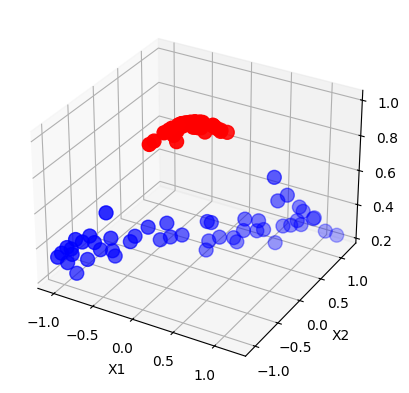

In [ ]:
def kernel_trans(X,y):
  r=np.exp(-(X**2).sum(1))
  ax=plt.subplot(projection='3d')
  ax.scatter3D(X[:,0],X[:,0],r,c=y,s=100,cmap='bwr')
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  return ax
kernel_trans(X,y)

In [ ]:
rbf_classifier=SVC(kernel='rbf')
rbf_classifier.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=rbf_classifier.predict(X_test)

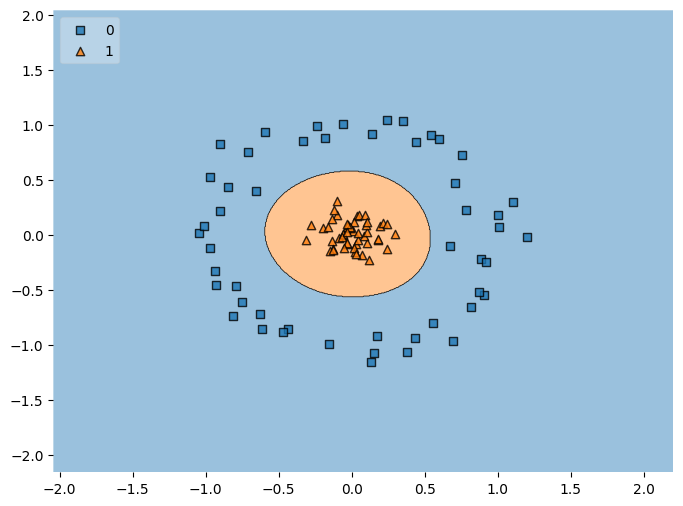

In [ ]:
# Plot the decision regions with customizations
plt.subplots(figsize=(8, 6))  # Custom figure size
plot_decision_regions(X=X, y=y, clf=rbf_classifier, legend=2)
# Customize labels, title, etc.
ax.set_xlabel('Feature 1')  # Custom X-axis label
ax.set_ylabel('Feature 2')  # Custom Y-axis label
ax.set_title('Customized Decision Boundary Plot')  # Custom title
# Display the plot
plt.show()

In [ ]:
print(accuracy_score(y_test,y_pred))
kf=KFold(n_splits=20,shuffle=True)
cv_scores_train = cross_val_score(rbf_classifier, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(rbf_classifier, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

1.0
1.0
1.0


In [ ]:
poly_classifier=SVC(kernel='poly',degree=2)
poly_classifier.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

In [ ]:
y_pred=poly_classifier.predict(X_test)

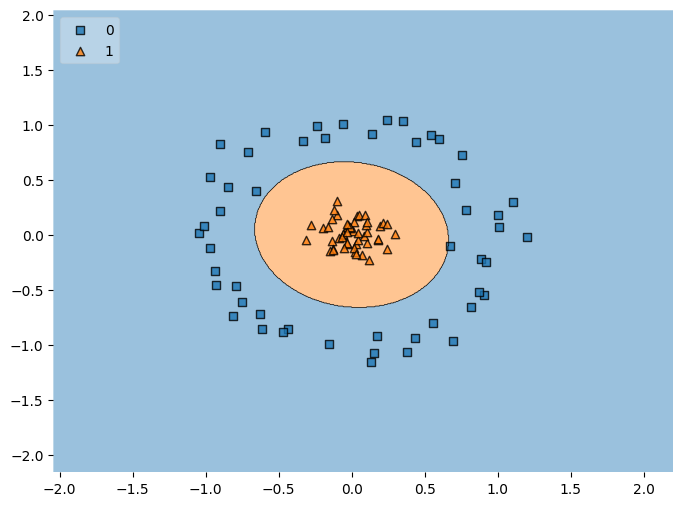

In [ ]:
# Plot the decision regions with customizations
plt.subplots(figsize=(8, 6))  # Custom figure size
plot_decision_regions(X=X, y=y, clf=poly_classifier, legend=2)
# Customize labels, title, etc.
ax.set_xlabel('Feature 1')  # Custom X-axis label
ax.set_ylabel('Feature 2')  # Custom Y-axis label
ax.set_title('Customized Decision Boundary Plot')  # Custom title
# Display the plot
plt.show()

In [ ]:
print(accuracy_score(y_test,y_pred))
kf=KFold(n_splits=20,shuffle=True)
cv_scores_train = cross_val_score(poly_classifier, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(poly_classifier, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

1.0
1.0
1.0


##`Mathematics for svm`

In [ ]:
import plotly.graph_objects as go
import numpy as np
X=np.linspace(-5,5,100)
y=np.linspace(-5,5,100)
X,y=np.meshgrid(X,y)
Z=X**2*y

In [ ]:
# Create a 3D surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=y, colorscale='Viridis')])
# Update layout for better visualization
fig.update_layout(
    title="3D Surface Plot",
    scene=dict(
        xaxis_title="X Axis",
        yaxis_title="Y Axis",
        zaxis_title="Z Axis",
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the plot
fig.show()

In [ ]:
# Generate data for the circle
theta = np.linspace(0, 2 * np.pi, 100)  # Angles for the circle
x = np.cos(theta)  # X-coordinates
y = np.sin(theta)  # Y-coordinates

# Create a plotly figure
fig = go.Figure()

# Add the circle to the plot
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='lines',
    name='Circle: X^2 + Y^2 = 1'
))

# Update layout for better visualization
fig.update_layout(
    title="Plot of X^2 + Y^2 = 1 (Circle)",
    xaxis_title="X",
    yaxis_title="Y",
    xaxis=dict(scaleanchor="y", scaleratio=1),  # Ensure circle appears circular
    yaxis=dict(scaleanchor="x", scaleratio=1),
    showlegend=True
)

# Show the plot
fig.show()


In [ ]:
# Create grid for the function
X=np.linspace(-5,5,100)
Y=np.linspace(-5,5,100)
X,Y=np.meshgrid(X,Y)
Z = X**2 * Y
# Create a set of points that lie on the circle
theta = np.linspace(0, 2 * np.pi, 100)  # Angles for the circle
x = np.cos(theta)  # X-coordinates
y = np.sin(theta)  # Y-coordinates
Z_circle=x**2*y

In [ ]:
fig=go.Figure(data=[go.Surface(z=Z,x=X,y=Y,colorscale='viridis',opacity=0.8)])
fig.add_trace(go.Scatter3d(x=x,y=y,z=Z_circle,mode='lines'))
fig.show()

In [ ]:
fig=go.Figure(data=[go.Contour(x=X[0,:],y=Y[:,0],z=Z,colorscale='viridis',opacity=0.8)])
fig.add_trace(go.Scatter(x=x,y=y,mode='lines'))
# Set aspect ratio
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    yaxis=dict(scaleanchor="x", scaleratio=1),
)

fig.show()

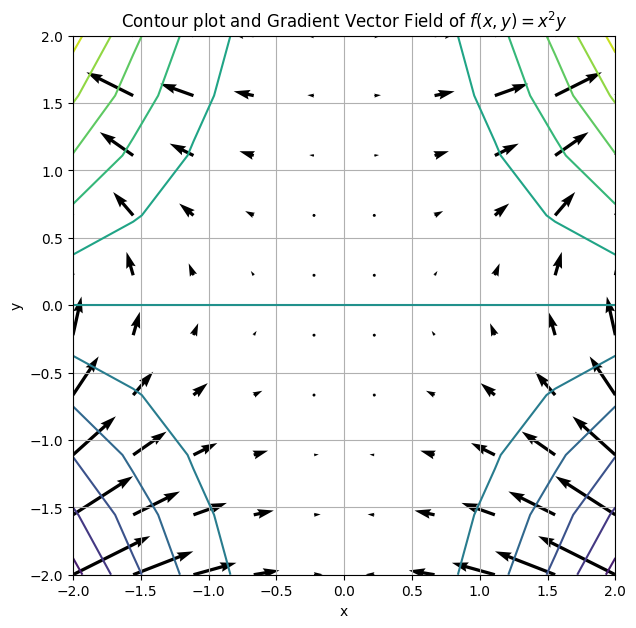

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)

X, Y = np.meshgrid(x, y)

# Compute the function values
Z = X**2 * Y

# Compute the gradient
U = 2*X*Y
V = X**2

plt.figure(figsize=(7, 7))

# Draw the contour plot
plt.contour(X, Y, Z, levels=10, cmap='viridis')

# Draw the gradient vector field
plt.quiver(X, Y, U, V)

plt.title('Contour plot and Gradient Vector Field of $f(x, y) = x^2y$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


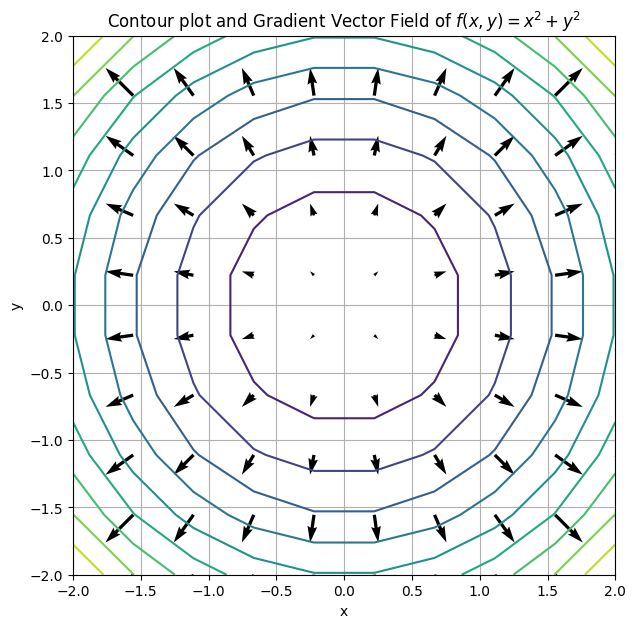

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)

X, Y = np.meshgrid(x, y)

# Compute the function values
Z = X**2 + Y**2

# Compute the gradient
U = 2*X
V = 2*Y

plt.figure(figsize=(7, 7))

# Draw the contour plot
plt.contour(X, Y, Z, levels=10, cmap='viridis')

# Draw the gradient vector field
plt.quiver(X, Y, U, V)

plt.title('Contour plot and Gradient Vector Field of $f(x, y) = x^2 + y^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


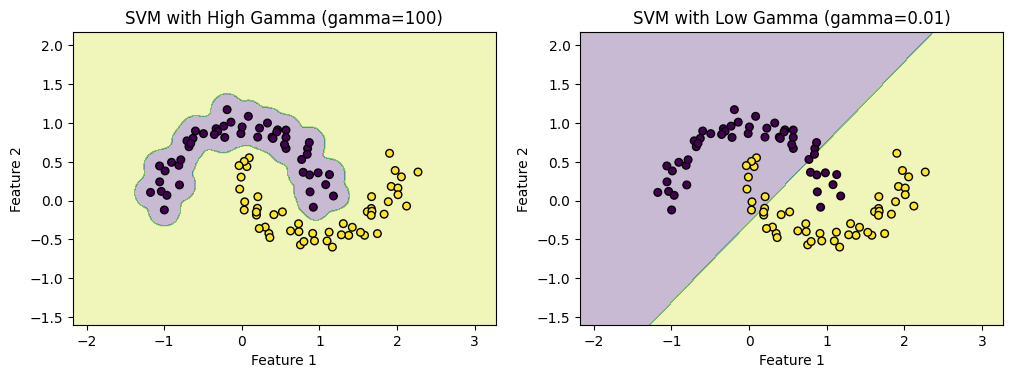

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generate a synthetic dataset
X, y = datasets.make_moons(n_samples=100, noise=0.1, random_state=42)

# Train SVM with a high gamma value
svm_high_gamma = SVC(kernel='rbf', gamma=100)
svm_high_gamma.fit(X, y)

# Train SVM with a low gamma value
svm_low_gamma = SVC(kernel='rbf', gamma=0.01)
svm_low_gamma.fit(X, y)


def plot_decision_boundary(model, X, y, title):
    # Create a grid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.gca().set_aspect('equal', adjustable='box')


# Plot decision boundary for high gamma
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(svm_high_gamma, X, y, 'SVM with High Gamma (gamma=100)')

# Plot decision boundary for low gamma
plt.subplot(1, 2, 2)
plot_decision_boundary(svm_low_gamma, X, y, 'SVM with Low Gamma (gamma=0.01)')


In [ ]:
import pandas as pd
df=pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
df['Species']=L.fit_transform(df['Species'])

In [ ]:
X=df.iloc[:,[1,3]]
X.head()

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [ ]:
y=df.iloc[:,[-1]]
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [ ]:
y=y.values
y = y.ravel()

In [ ]:
svm1 = SVC(kernel='rbf', gamma=3)
svm1.fit(X, y)

SVC(gamma=3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


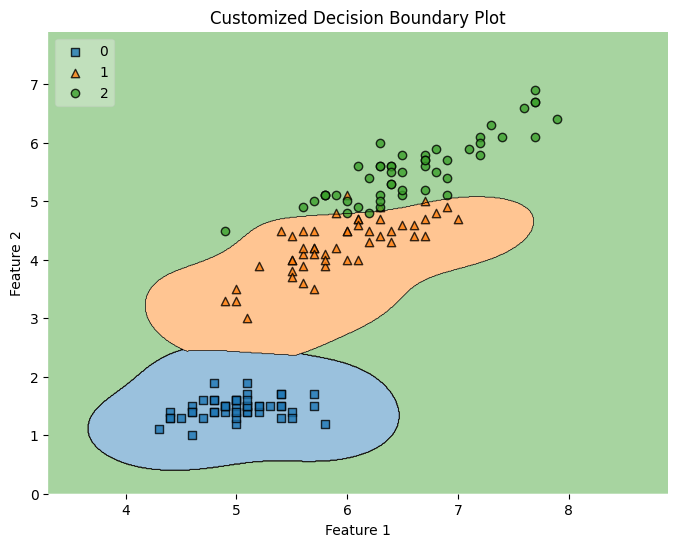

In [ ]:
from mlxtend.plotting import plot_decision_regions
# Plot the decision regions with customizations
fig,ax=plt.subplots(figsize=(8, 6))  # Custom figure size
plot_decision_regions(X=X.values, y=y.ravel(),clf=svm1,legend=2)
# Customize labels, title, etc
ax.set_xlabel('Feature 1')  # Custom X-axis label
ax.set_ylabel('Feature 2')  # Custom Y-axis label
ax.set_title('Customized Decision Boundary Plot')  # Custom title
# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


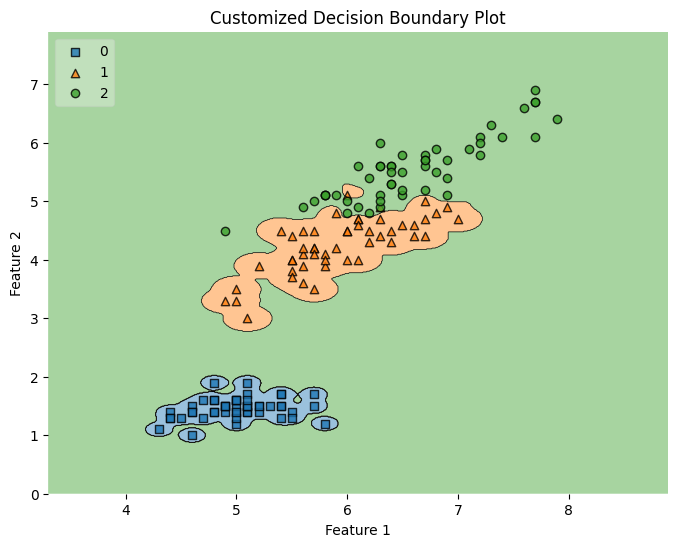

In [ ]:
svm2 = SVC(kernel='rbf', gamma=100)
svm2.fit(X, y)
# Plot the decision regions with customizations
fig,ax=plt.subplots(figsize=(8, 6))  # Custom figure size
plot_decision_regions(X=X.values, y=y,clf=svm,legend=2)
# Customize labels, title, etc
ax.set_xlabel('Feature 1')  # Custom X-axis label
ax.set_ylabel('Feature 2')  # Custom Y-axis label
ax.set_title('Customized Decision Boundary Plot')  # Custom title
# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


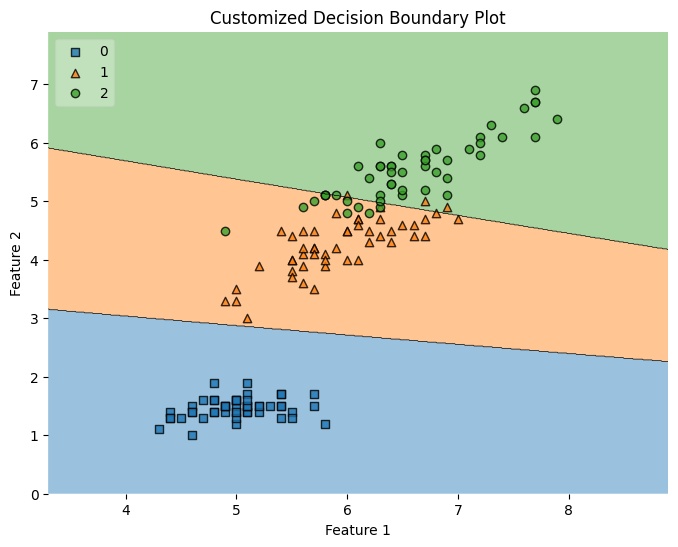

In [ ]:
svm3 = SVC(kernel='rbf', gamma=0.01)
svm3.fit(X, y)
# Plot the decision regions with customizations
fig,ax=plt.subplots(figsize=(8, 6))  # Custom figure size
plot_decision_regions(X=X.values, y=y,clf=svm3,legend=2)
# Customize labels, title, etc
ax.set_xlabel('Feature 1')  # Custom X-axis label
ax.set_ylabel('Feature 2')  # Custom Y-axis label
ax.set_title('Customized Decision Boundary Plot')  # Custom title
# Display the plot
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
train_cv_score = cross_val_score(svm1, X_train, y_train, cv=5)  # 5-fold CV
test_cv_score = cross_val_score(svm1, X_test, y_test, cv=5)  # 5-fold CV

In [ ]:
import numpy as np
print(np.mean(train_cv_score))
print(np.mean(test_cv_score))

0.9238095238095237
0.9238095238095237


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
train_cv_score = cross_val_score(svm2, X_train, y_train, cv=5)  # 5-fold CV
test_cv_score = cross_val_score(svm2, X_train, y_train, cv=5)  # 5-fold CV
print(np.mean(train_cv_score))
print(np.mean(test_cv_score))

0.8095238095238095
0.8095238095238095


In [ ]:
train_cv_score = cross_val_score(svm3, X_train, y_train, cv=5)  # 5-fold CV
test_cv_score = cross_val_score(svm3, X_train, y_train, cv=5)  # 5-fold CV
print(np.mean(train_cv_score))
print(np.mean(test_cv_score))

0.8095238095238095
0.8095238095238095


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier
clf = SVC(kernel='linear', decision_function_shape='ovr')  # 'ovr' for One-vs-Rest (One-vs-All)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
train_cv_score = cross_val_score(clf, X_train, y_train, cv=25)  # 5-fold CV
test_cv_score = cross_val_score(clf, X_train, y_train, cv=25)  # 5-fold CV
print(np.mean(train_cv_score))
print(np.mean(test_cv_score))

Accuracy: 100.00%
0.96
0.96


In [ ]:
# Initialize the SVM classifier
clf = SVC(kernel='linear', decision_function_shape='ovo')  # 'ovo' for One-vs-one

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
train_cv_score = cross_val_score(clf, X_train, y_train, cv=25)  # 5-fold CV
test_cv_score = cross_val_score(clf, X_train, y_train, cv=25)  # 5-fold CV
print(np.mean(train_cv_score))
print(np.mean(test_cv_score))

Accuracy: 100.00%
0.96
0.96


#`SVR`

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
S_x=StandardScaler()
S_y=StandardScaler()
X=S_x.fit_transform(X)
y = y.values.reshape(-1, 1)
y=S_y.fit_transform(y)

In [ ]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [ ]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [ ]:
y=y.ravel()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import  SVR
reg=SVR(kernel='rbf')
reg.fit(X,y)

SVR()

In [ ]:
y_pred=S_y.inverse_transform(reg.predict(S_x.fit_transform([[6.5]])).reshape(-1,1))
y_pred

array([[131106.77303274]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)

In [ ]:
X=poly.fit_transform(X)

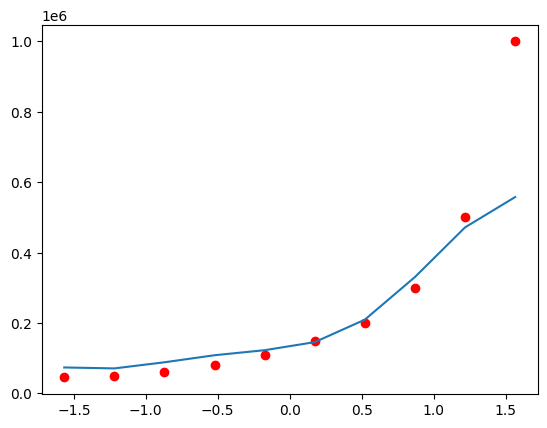

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(S_x.fit_transform(X),S_y.inverse_transform(y.reshape(-1,1)),color='red')
plt.plot(S_x.inverse_transform(X),S_y.inverse_transform(reg.predict(X).reshape(-1,1)))
plt.show()